# Project F, Michele Marinucci

#### Load data

In [783]:
#clean environment, load packages and data
%reset -f
import pandas as pd
import numpy as np
from itertools import combinations
from datetime import datetime, timedelta
import matplotlib.pylab as plt; plt.style.use('ggplot')
df=pd.read_csv('database/data.csv')
df=df.rename(columns={'Date':'date','Quarter':'quarter'})
df.head()

,date,permno,price,quarter,pe,leverage,earnings_quality
0,20000103,10104,118.15625,NaN,NaN,NaN,NaN
1,20000103,10107,116.53125,NaN,NaN,NaN,NaN
2,20000103,10145,56.68750,NaN,NaN,NaN,NaN
3,20000103,10516,11.75000,NaN,NaN,NaN,NaN
4,20000103,10623,22.68750,NaN,NaN,NaN,NaN


#### Calculate log-returns

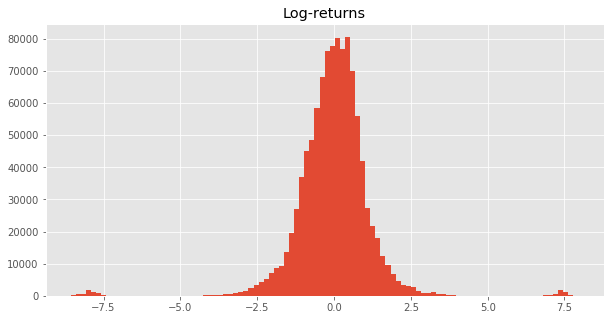

In [784]:
#compute log returns column
df['logr']=(np.log(df.price)-np.log(df.price).shift()).bfill()

#plot to check for log-normality, and notice thick tails
df.logr.hist(bins=100,figsize=(10,5))
plt.title('Log-returns')
plt.show()

#### Handle data types

In [785]:
#transform date in dates
df.date=pd.to_datetime(df.date,format='%Y%m%d')

#check other data types
df.dtypes

date                datetime64[ns]
permno                       int64
price                      float64
quarter                    float64
pe                         float64
leverage                   float64
earnings_quality           float64
logr                       float64
dtype: object

#### Handle missing data

In [786]:
#handle missing data
def count_na(df):
    print('Missing data by column:')
    return df.apply(lambda x: pd.isna(x).sum())
count_na(df)

Missing data by column:


date                      0
permno                    0
price                 18855
quarter             1036818
pe                  1036972
leverage            1036896
earnings_quality    1037025
logr                      0
dtype: int64

In [787]:
#let's handle price missing data
#first,sort data and see what it looks like
df=df.sort_values(by=['permno','date']).reset_index(drop=True)
df.head(50)

,date,permno,price,quarter,pe,leverage,earnings_quality,logr
0,2000-01-03,10104,118.15625,NaN,NaN,NaN,NaN,-0.013848
1,2000-01-04,10104,107.71875,NaN,NaN,NaN,NaN,0.696343
2,2000-01-05,10104,102.00000,NaN,NaN,NaN,NaN,0.654681
3,2000-01-06,10104,95.93750,NaN,NaN,NaN,NaN,0.594585
4,2000-01-07,10104,103.31250,NaN,NaN,NaN,NaN,0.627022
5,2000-01-10,10104,115.81250,NaN,NaN,NaN,NaN,0.635989
6,2000-01-11,10104,112.34375,NaN,NaN,NaN,NaN,0.623061
7,2000-01-12,10104,105.59375,NaN,NaN,NaN,NaN,0.560060
8,2000-01-13,10104,105.06250,NaN,NaN,NaN,NaN,0.563341
9,2000-01-14,10104,106.84375,NaN,NaN,NaN,NaN,0.549286


In [788]:
#forward fill missing bid and ask prices
df.price=df.price.ffill()

In [789]:
#filter fundamentals with missing values
fundamentals=['quarter','pe','leverage','earnings_quality']
na_count_byrow=df[fundamentals].isna().sum(axis=1)
incomplete_fundamentals=df[(na_count_byrow>0)&(na_count_byrow<4)]#4 is when it's not a financial realise date, 0 if no NAs at all
incomplete_fundamentals

,date,permno,price,quarter,pe,leverage,earnings_quality,logr
4782,2001-12-31,10107,66.255,2.0,60.784404,NaN,3.045992,1.567756
5474,2004-09-30,10107,27.645,1.0,37.358108,NaN,1.585047,0.892432
5538,2004-12-31,10107,26.720,2.0,29.043478,NaN,2.202137,0.666558
5599,2005-03-31,10107,24.160,3.0,23.456311,NaN,4.927429,0.660972
5663,2005-06-30,10107,24.830,4.0,22.169643,NaN,4.487838,0.631078
...,...,...,...,...,...,...,...,...
1016404,2013-09-30,92121,50.545,3.0,NaN,0.247075,4.274874,0.464499
1025172,2011-03-31,92402,36.795,1.0,NaN,0.381134,-0.771994,-0.268959
1025235,2011-06-30,92402,37.695,2.0,NaN,0.367725,1.757468,-0.537525
1025299,2011-09-30,92402,30.345,3.0,NaN,0.360326,3.513568,-0.718125


In [790]:
#these incomplete fundamentals must be dropped, otherwise they would affect final results
permno_to_drop=incomplete_fundamentals['permno'].unique().tolist()
print('Tickers to drop:\n',permno_to_drop,'\n\nTotal permnos dropped:',len(permno_to_drop))
df=df[np.logical_not(df.permno.isin(permno_to_drop))]

Tickers to drop:
 [10107, 10516, 10623, 11674, 11786, 11896, 12060, 12073, 12490, 12542, 13936, 13983, 15202, 16678, 17144, 18411, 19350, 20415, 20626, 21020, 21573, 21776, 21936, 22517, 22752, 22779, 23229, 23309, 23536, 23931, 24053, 24109, 24205, 24643, 25081, 25232, 26112, 27959, 28388, 32803, 35044, 35554, 38703, 39917, 44206, 47896, 48506, 49656, 51596, 56274, 58819, 59408, 60871, 61815, 64653, 64936, 66093, 66157, 66384, 68144, 69032, 69550, 71563, 75034, 75186, 75607, 78844, 78916, 78975, 79678, 80100, 81481, 81540, 81655, 81774, 84129, 84767, 84788, 85035, 85257, 87030, 87432, 87541, 88873, 89003, 89071, 89196, 89258, 90071, 90215, 90373, 90386, 90454, 91066, 91152, 91233, 92121, 92402, 93002] 

Total permnos dropped: 99


In [791]:
#check if there are any companies with no quarter info
no_quarter_info=df.groupby('permno')[['quarter']].sum()
no_quarter_info=no_quarter_info[no_quarter_info.quarter==0]
no_quarter_info=no_quarter_info.index.tolist()
print('Exactly {} companies have no quarter information, including:\n'.format(len(no_quarter_info)),no_quarter_info)

#drop them any such company
df=df[np.logical_not(df.permno.isin(no_quarter_info))]

Exactly 1 companies have no quarter information, including:
 [12346]


In [792]:
#check remaining missing data
count_na(df)

Missing data by column:


date                     0
permno                   0
price                    0
quarter             659463
pe                  659463
leverage            659463
earnings_quality    659463
logr                     0
dtype: int64

In [793]:
#same number everywhere, corresponding to non-quarter-release dates! These will show as NaN

In [794]:
#sort back by date first and permno second
df=df.sort_values(by=['date','permno']).reset_index(drop=True)

#show complete data and some info
print('Shape of data:',df.shape,
      f'\nNumber of stocks: {len(df.permno.unique())}',
      f'\nFirst date: {min(df.date)}',
      f'\nLast date: {max(df.date)}')
df.head()

Shape of data: (667047, 8) 
Number of stocks: 196 
First date: 2000-01-03 00:00:00 
Last date: 2017-01-10 00:00:00


,date,permno,price,quarter,pe,leverage,earnings_quality,logr
0,2000-01-03,10104,118.15625,NaN,NaN,NaN,NaN,-0.013848
1,2000-01-03,10145,56.68750,NaN,NaN,NaN,NaN,-0.720606
2,2000-01-03,10696,38.09375,NaN,NaN,NaN,NaN,0.518236
3,2000-01-03,11600,23.46875,NaN,NaN,NaN,NaN,-0.484380
4,2000-01-03,11850,78.31250,NaN,NaN,NaN,NaN,0.396922


#### Development of trading strategy

ALGORITHM. To simplify, over the period I will only hold one pair at the time; hence, I will only evaluate potential new pairs once the previous pair has been closed. The pseudo algorithm I was planning to use goes as follows here below. Notice that, before starting, I standardized PE ratio, leverage and earnings quality. 
 

1.	Given first quarter of first year, find all possible pairs of stocks (excluding “combination” of the same stock). 
2.	For each combination take difference in PE ratio and difference in leverage ratio. Since they are standardized, it’s ok to sum the two to get a unique measure, called “distance”.
3.	Rank distance.
4.	Considering top 5 (this hyperparameter can be changed) pairs with lowest distance, check for divergence in earnings quality. If pair with max divergence is over a certain divergence threshold, long high earnings quality stock and short low earnings quality stock. Else, wait until next quarter and try again. 
6.	Close position if divergence in earnings quality is no longer over the divergence threshold in previous point. If position is closed, start again with first, using current quarter and current year this time. 


In [795]:
#standardize fundamentals
fundamentals=['leverage','earnings_quality','pe']
df[fundamentals]=df[fundamentals].apply(lambda x: (x-x.mean())/x.std())

#find all quarter dates and sort them
quarter_dates=sorted(list(set(df.date[df.quarter.notna()])))

#define distance and divergence functions
def distance(first,second,current_day_df):
    pe_distance=abs(float(current_day_df.pe[current_day_df.permno==first])-float(current_day_df.pe[current_day_df.permno==second]))
    leverage_distance=abs(float(current_day_df.leverage[current_day_df.permno==first])-float(current_day_df.leverage[current_day_df.permno==second]))
    return pe_distance+leverage_distance

def divergence(first,second,current_day_df):
    return float(current_day_df.earnings_quality[current_day_df.permno==first])-float(current_day_df.earnings_quality[current_day_df.permno==second])

###### Pairs trading algorithm

In [796]:
#DEFINE ALGORITHM
def algorithm(top_closest=5,divergence_threshold=0.08,current_date=min(quarter_dates),end_period=datetime.strptime("2016-06-01", "%Y-%m-%d")):  
    
    print('------------------------------------------------------\nSTART ALGORITHM\n')

    positions_held=[]
    while current_date < end_period:

        #print separators and current date
        print(f'------------------------------------------------------',
              f'\nEvaluate new position! Current date:{current_date}\n')

        #gather all data on that "quarter date"; put it in a dataframe
        current_day_df=df[df.date==current_date][df.quarter.notna()]

        #find all combos
        permno_current_day=current_day_df['permno'].unique().tolist()
        combos=list(combinations(permno_current_day,2))
        print('Number of of possible combos:',len(combos),'\n')


        #find closest combos and corresponding divergences
        differences_columns=['first','second','distance','divergence']; differences_data=[]
        for  first,second in combos:
            differences_data.append([first,
                                     second,
                                     distance(first,second,current_day_df),
                                     divergence(first,second,current_day_df)])

        differences_df=pd.DataFrame(differences_data,columns=differences_columns)
        closest_combos=differences_df.sort_values(by='distance')[:top_closest]

        #find top combo
        top_combo_info=closest_combos[abs(closest_combos.divergence)==abs(closest_combos.divergence).max()]
        top_combo=top_combo_info[['first','second']].values.tolist()[0]
        print('Top combo:',top_combo,'\n')

        #invest only if, among the top 5 closest, the stock with top divergence is above divergence threshold
        invest_yes=abs(closest_combos.divergence).max()>divergence_threshold
        if invest_yes:
            print('Invest!\n')
            if float(top_combo_info.divergence)>0:
                long=int(top_combo_info['first']);short=int(top_combo_info.second)
            else:
                long=int(top_combo_info.second);short=int(top_combo_info['first'])


            print(f'Go long on {long} and short on {short}')

            #future quarter dates for pairs
            quarter_dates_pairs=list(df[df.permno.isin(top_combo)&df.quarter.notna()].date.drop_duplicates())

            #WHEN TO CLOSE POSITION
            date_opened=current_date
            still_open=True
            while still_open:
                try:
                    #move onto next date and get the df portion relative to such quarter date
                    current_date=quarter_dates_pairs[quarter_dates_pairs.index(current_date)+1]
                    current_day_df=df[df.date==current_date][df.quarter.notna()]
                    current_day_df=current_day_df[current_day_df.permno.isin(top_combo)]

                    #condition to close
                    close_yes=abs(divergence(top_combo[0],top_combo[1],current_day_df))<divergence_threshold
                    if close_yes:
                        print('\n------------------------------------------------------\n',
                              f'Close position! Current date:{current_date}')
                        positions_held.append({'long':long,'short':short,'opened':date_opened,'closed':current_date})
                        #move onto next general quarter date
                        current_date=quarter_dates[quarter_dates.index(current_date)+1]
                        still_open=False
                    else:
                        print('\n------------------------------------------------------\n',
                              f'Hold position! Current date:{current_date}')
                        #move onto next pairs-specific quarter date
                        current_date=quarter_dates_pairs[quarter_dates_pairs.index(current_date)+1]
                        continue
                except IndexError:
                    print('\n------------------------------------------------------\n',
                          f'\nEnd of period, close position! Current date:{current_date}')
                    positions_held.append({'long':long,'short':short,'opened':date_opened,'closed':current_date})
                    break 
        else:
            print('Do not invest, go onto next quarter date.') 
            #go onto next quarter date
            current_date=quarter_dates[quarter_dates.index(current_date)+1]

    print('------------------------------------------------------\nEND ALGORITHM',
         '\n------------------------------------------------------')
    
    #positions summary
    position_summary=pd.DataFrame(positions_held)
    
    print('\n',position_summary)
    print('\n------------------------------------------------------\n')
    return position_summary

In [797]:
#evaluate and plot strategy detailed by algorithm above
def permormance_analysis(position_summary,df):
    result=pd.DataFrame()
    for i in range(len(position_summary)):

        #compute long and short return
        position=position_summary.iloc[[i]]
        long_return=df[df.permno==int(position.long)][df['date']>position.iloc[0]['opened']][df['date']<position.iloc[0]['closed']][['date','logr']].set_index('date')
        short_return=-df[df.permno==int(position.short)][df['date']>position.iloc[0]['opened']][df['date']<position.iloc[0]['closed']][['date','logr']].set_index('date')

        #merge the two; compute pair return assuming equal weighting
        pair_return=(long_return+short_return)
        #stack onto result dataframe
        result=pd.concat([result,pair_return])

    #complete result with cumulative returns
    result=result.reset_index()
    result['cum_logr']=np.cumsum(result.logr)
    print(result)
    
    #plot 1 dollar invested in this strategy
    fig=plt.plot(result.date,result.cum_logr)
    plt.title('Evolution of $1 invested in this strategy')
    plt.show()
    
    return result

------------------------------------------------------
START ALGORITHM

------------------------------------------------------ 
Evaluate new position! Current date:2000-01-31 00:00:00

Number of of possible combos: 21 

Top combo: [27828, 66181] 

Do not invest, go onto next quarter date.
------------------------------------------------------ 
Evaluate new position! Current date:2000-02-29 00:00:00

Number of of possible combos: 15 

Top combo: [10104, 87184] 

Do not invest, go onto next quarter date.
------------------------------------------------------ 
Evaluate new position! Current date:2000-03-31 00:00:00

Number of of possible combos: 4753 



C:\Users\miche\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Top combo: [48653, 86783] 

Invest!

Go long on 86783 and short on 48653

------------------------------------------------------
 Close position! Current date:2000-06-30 00:00:00
------------------------------------------------------ 
Evaluate new position! Current date:2000-07-31 00:00:00

Number of of possible combos: 21 

Top combo: [60097, 76076] 

Invest!

Go long on 76076 and short on 60097

------------------------------------------------------
 Close position! Current date:2000-10-31 00:00:00
------------------------------------------------------ 
Evaluate new position! Current date:2000-11-30 00:00:00

Number of of possible combos: 15 

Top combo: [10104, 75510] 

Invest!

Go long on 75510 and short on 10104

------------------------------------------------------
 Close position! Current date:2001-02-28 00:00:00
------------------------------------------------------ 
Evaluate new position! Current date:2001-04-30 00:00:00

Number of of possible combos: 15 

Top combo: [27828, 

C:\Users\miche\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


 Close position! Current date:2002-01-31 00:00:00
------------------------------------------------------ 
Evaluate new position! Current date:2002-02-28 00:00:00

Number of of possible combos: 21 

Top combo: [10104, 87184] 

Invest!

Go long on 10104 and short on 87184

------------------------------------------------------
 Hold position! Current date:2002-05-31 00:00:00

------------------------------------------------------
 Close position! Current date:2004-08-31 00:00:00
------------------------------------------------------ 
Evaluate new position! Current date:2004-09-30 00:00:00

Number of of possible combos: 7875 

Top combo: [26403, 84381] 

Invest!

Go long on 26403 and short on 84381

------------------------------------------------------
 Close position! Current date:2004-12-31 00:00:00
------------------------------------------------------ 
Evaluate new position! Current date:2005-01-31 00:00:00

Number of of possible combos: 15 

Top combo: [27828, 66181] 

Invest!

Go l

C:\Users\miche\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\miche\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


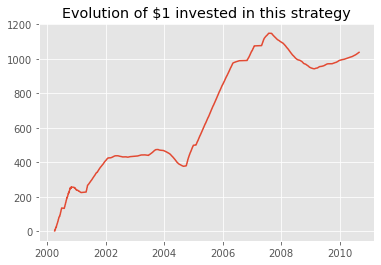

,date,logr,cum_logr
0,2000-04-03,2.655821,2.655821
1,2000-04-04,2.827036,5.482857
2,2000-04-05,2.777111,8.259968
3,2000-04-06,-0.602090,7.657878
4,2000-04-07,2.765664,10.423542
...,...,...,...
2312,2010-08-24,0.523748,1035.238347
2313,2010-08-25,0.503476,1035.741822
2314,2010-08-26,0.575399,1036.317221
2315,2010-08-27,0.575531,1036.892752


In [798]:
#EXECUTE AND TEST ALGORITHM
position_summary=algorithm(top_closest=5,divergence_threshold=0.05,current_date=quarter_dates[0],end_period=quarter_dates[70])
permormance_analysis(position_summary,df)

#### Backtesting

------------------------------------------------------
START ALGORITHM

------------------------------------------------------ 
Evaluate new position! Current date:2008-02-29 00:00:00

Number of of possible combos: 55 

Top combo: [87184, 90992] 

Invest!

Go long on 87184 and short on 90992

------------------------------------------------------
 Close position! Current date:2009-08-31 00:00:00
------------------------------------------------------ 
Evaluate new position! Current date:2009-09-30 00:00:00

Number of of possible combos: 10153 



C:\Users\miche\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\miche\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Top combo: [12431, 66800] 

Invest!

Go long on 66800 and short on 12431

------------------------------------------------------
 Hold position! Current date:2009-12-31 00:00:00

------------------------------------------------------
 Hold position! Current date:2010-06-30 00:00:00

------------------------------------------------------
 Close position! Current date:2010-12-31 00:00:00
------------------------------------------------------ 
Evaluate new position! Current date:2011-01-31 00:00:00

Number of of possible combos: 28 

Top combo: [60097, 66181] 

Invest!

Go long on 66181 and short on 60097

------------------------------------------------------
 Close position! Current date:2011-10-31 00:00:00
------------------------------------------------------ 
Evaluate new position! Current date:2011-11-30 00:00:00

Number of of possible combos: 55 

Top combo: [10104, 89728] 

Invest!

Go long on 89728 and short on 10104

------------------------------------------------------
 Hold p

C:\Users\miche\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\miche\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


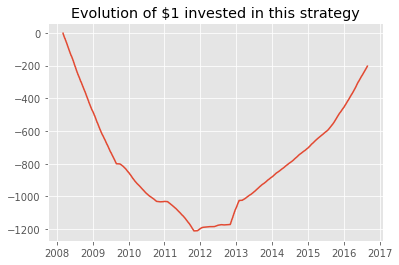

,date,logr,cum_logr
0,2008-03-03,-2.324664,-2.324664
1,2008-03-04,-2.326425,-4.651089
2,2008-03-05,-2.310668,-6.961757
3,2008-03-06,-2.313731,-9.275488
4,2008-03-07,-2.334751,-11.610240
...,...,...,...
2010,2016-08-24,1.597244,-209.961604
2011,2016-08-25,1.603687,-208.357917
2012,2016-08-26,1.605544,-206.752374
2013,2016-08-29,1.603223,-205.149151


In [799]:
#backtest using a different period
position_summary=algorithm(top_closest=5,divergence_threshold=0.05,current_date=quarter_dates[70],end_period=quarter_dates[140])
permormance_analysis(position_summary,df)

------------------------------------------------------
START ALGORITHM

------------------------------------------------------ 
Evaluate new position! Current date:2000-01-31 00:00:00

Number of of possible combos: 21 

Top combo: [27828, 66181] 

Invest!

Go long on 66181 and short on 27828

------------------------------------------------------
 Close position! Current date:2000-07-31 00:00:00
------------------------------------------------------ 
Evaluate new position! Current date:2000-08-31 00:00:00

Number of of possible combos: 15 

Top combo: [10104, 75510] 

Invest!

Go long on 75510 and short on 10104

------------------------------------------------------
 Hold position! Current date:2000-11-30 00:00:00

------------------------------------------------------
 Close position! Current date:2001-05-31 00:00:00
------------------------------------------------------ 
Evaluate new position! Current date:2001-07-31 00:00:00

Number of of possible combos: 15 

Top combo: [60097, 76

C:\Users\miche\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\miche\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Hold position! Current date:2001-10-31 00:00:00

------------------------------------------------------
 Close position! Current date:2002-04-30 00:00:00
------------------------------------------------------ 
Evaluate new position! Current date:2002-05-31 00:00:00

Number of of possible combos: 21 

Top combo: [10104, 87184] 

Invest!

Go long on 10104 and short on 87184

------------------------------------------------------
 Close position! Current date:2003-02-28 00:00:00
------------------------------------------------------ 
Evaluate new position! Current date:2003-03-31 00:00:00

Number of of possible combos: 7260 

Top combo: [77768, 80204] 

Invest!

Go long on 77768 and short on 80204

------------------------------------------------------
 Close position! Current date:2003-06-30 00:00:00
------------------------------------------------------ 
Evaluate new position! Current date:2003-07-31 00:00:00

Number of of possible combos: 15 

Top combo: [27828, 64282] 

Invest!

Go lo

C:\Users\miche\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\miche\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


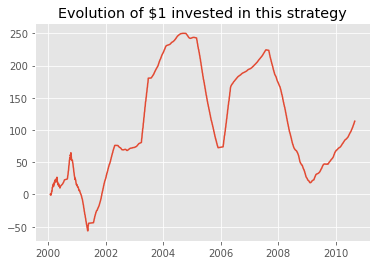

,date,logr,cum_logr
0,2000-02-01,0.387700,0.387700
1,2000-02-02,0.334754,0.722454
2,2000-02-03,0.295958,1.018412
3,2000-02-04,-2.108425,-1.090013
4,2000-02-07,0.204475,-0.885538
...,...,...,...
2435,2010-08-24,0.523748,111.486549
2436,2010-08-25,0.503476,111.990025
2437,2010-08-26,0.575399,112.565423
2438,2010-08-27,0.575531,113.140954


In [801]:
#backtest using different hyperparameters
position_summary=algorithm(top_closest=3,divergence_threshold=0.03,current_date=quarter_dates[0],end_period=quarter_dates[70])
permormance_analysis(position_summary,df)